Strongly nonexponential time-resolved uorescence of quantum-dot ensembles in three-dimensional photonic crystals by Ivan S. Nikolaev

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

Model the nonexponential decay curve with a continuous distribution of decay rate,$\gamma$, (or $1/\tau$):

$$ I(t) = I(0)\int_{\gamma = 0}^\infty \phi(\gamma) e^{-\gamma t} d\gamma$$

where $\phi(\gamma)$ is a distribution of decay rates with dimensions of time.

In [4]:
from numpy import exp, arcsinh, log
import numpy as np
import scipy.optimize, scipy.integrate

## Example

[ 0.97688179]


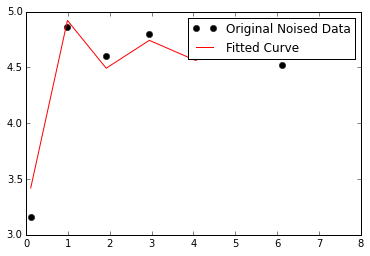

In [5]:
#Here's an example of fitting a curve defined in terms of an integral. 
#The curve is the integral of sin(t*w)/t+p over t from 0 to Pi. 
#Our x data points correspond to w, and we're adjusting the p parameter to to get the data to fit.

import math, numpy, scipy.optimize, scipy.integrate

def integrand(t, args):
    w, p = args
    return math.sin(t * w)/t + p

def curve(w, p):
    res = scipy.integrate.quad(integrand, 0.0, numpy.pi, [w, p])
    return res[0]

vcurve = numpy.vectorize(curve, excluded=set([1]))

truexdata = numpy.asarray([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
trueydata = vcurve(truexdata, 1.0)

xdata = truexdata + 0.1 * numpy.random.randn(8)
ydata = trueydata + 0.1 * numpy.random.randn(8)

popt, pcov = scipy.optimize.curve_fit(vcurve,
                                      xdata, ydata,
                                      p0=[2.0])
print(popt)
plt.figure()
plt.plot(xdata, ydata, 'ko', label="Original Noised Data")
plt.plot(xdata, vcurve(xdata, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

## Distribution of decays

In [ ]:
def phi_func(gamma):
    """
    Lognormal distribution function describing the
    distribution of decay rates with the dimension time
    """
    A = 1
    w = arcsinh(gammaDelta/(2*gammaMF))
    num = -log(gamma/gammaMF)**2
    return A*exp(num/w**2)

res = scipy.integrate.quad(phi_func, 0.0, np.inf, [t, gammaDelta, gammaMF])

In [ ]:
#TODO: Normalise phi
#TODO: Make phi a function that works
#TODO: Calculate chi-2

def integrand(gamma, args):
    # gamma is what we are integrating over
    # t is xdata and gammaDelta and gammaMF are what we are fitting
    t, gammaDelta, gammaMF = args
    
    A = 1
    w = arcsinh(gammaDelta/(2*gammaMF))
    num = -log(gamma/gammaMF)**2
    phi = A*exp(num/w**2)
    
    return phi*exp(-gamma*t)

def curve(t, gammaDelta, gammaMF):
    ub = np.inf  # The upper limit of integral, could use use np.inf for +infinity 
    # Integrates over the first argument of integrand, gamma
    res = scipy.integrate.quad(integrand, 0.0, ub, [t, gammaDelta, gammaMF])
    return res[0]

# Only vectorise over t (exclude the gammas)
vcurve = np.vectorize(curve, excluded=set([1,2]))

truexdata = np.linspace(0,80,100)  # time variable
trueydata = vcurve(truexdata, 1/25, 1/15)

xdata = truexdata #+ 0.001 * np.random.randn(truexdata.size)
ydata = trueydata + 0.01 * np.random.randn(truexdata.size)

popt, pcov = scipy.optimize.curve_fit(vcurve,
                                      xdata, ydata,
                                      p0=[1/35, 1/15])
print(popt)

plt.figure()
plt.plot(xdata, ydata, 'ko', label="Original Noised Data")
plt.plot(xdata, vcurve(xdata, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(2,1,1)
# ax.plot(xdata, ydata, 'ko', label="Original Noised Data")
# ax.plot(xdata, vcurve(xdata, *popt), 'r-', label="Fitted Curve")
# # ax.set_yscale('log')
# ax.legend(loc='best')
# plt.show()

## Chi-Squared Goodness of fit test

For the relation to lifetime data see 'Topics in Fluorescence Spectroscopy - Volume 2' pp230

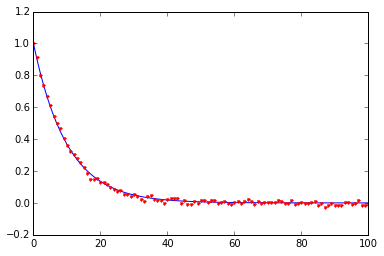

In [24]:
# https://hflog.wordpress.com/2014/04/01/how-to-perform-a-chi-squared-goodness-of-fit-test-in-python/
def chisquare(observed_values,expected_values):
    test_statistic=0
    for observed, expected in zip(observed_values, expected_values):
        test_statistic+=(float(observed)-float(expected))**2/float(expected)
    return test_statistic

tau = 10
t = np.linspace(0,100,101)
expec = np.exp(-t/tau)
observ = expec + 0.01 * np.random.randn(expec.size)

plt.plot(t,expec,'-b')
plt.plot(t,observ,'.r')

a = chisquare(observ,expec)

In [31]:
def chisquare2(observed_values,expected_values):
    standd = np.std(observed_values-expected_values) # can include axis when there are more collumns for reppitions
    test_statistic=0
    for observed, expected in zip(observed_values, expected_values):
        test_statistic+=(float(observed)-float(expected)/float(0.6))**2
    return test_statistic

tau = 10
t = np.linspace(0,100,101)
expec = np.exp(-t/tau)
observ = expec + 0.01 * np.random.randn(expec.size)

# Evaluate reduced chisquare2
chisquare2(observ,expec)/(t.size-1-1)

0.02501690499655702

In [21]:
# Alternatievly using the scipy function
from scipy.stats import chisquare
chisquare(observ, f_exp=expec)[0]

0.0018321807091345452